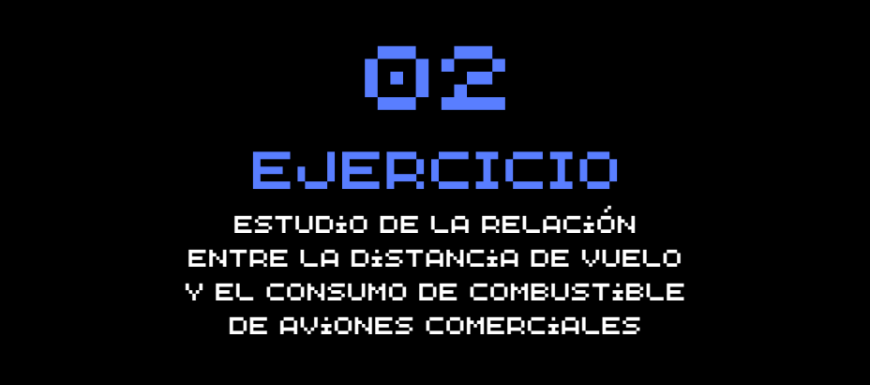
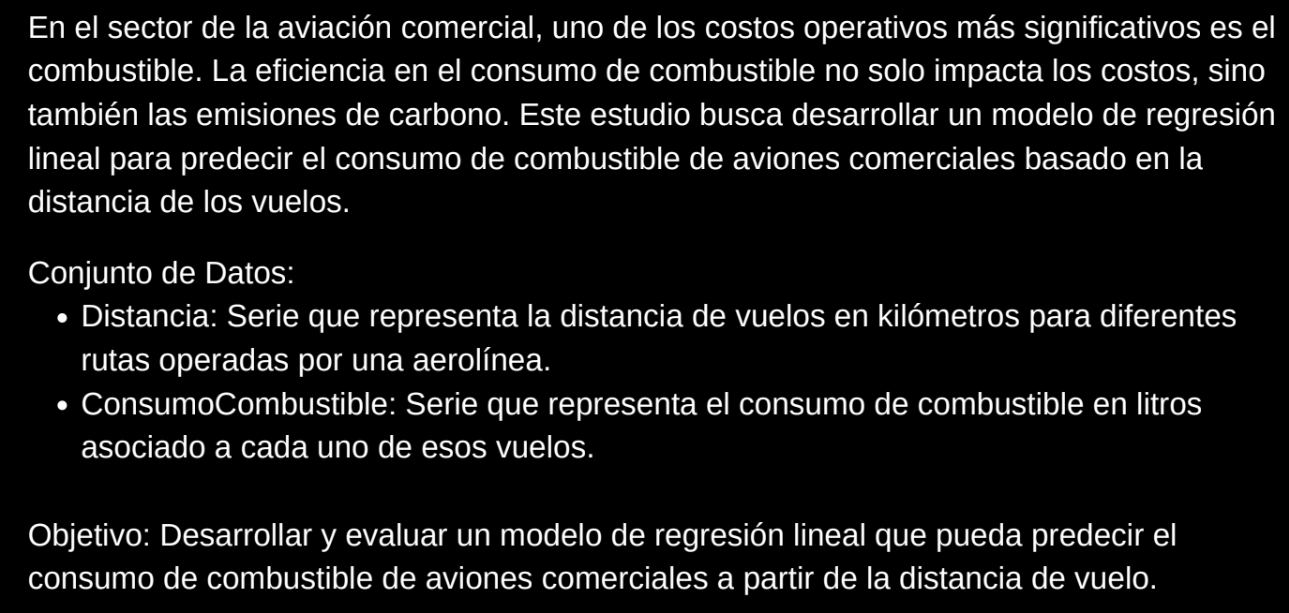
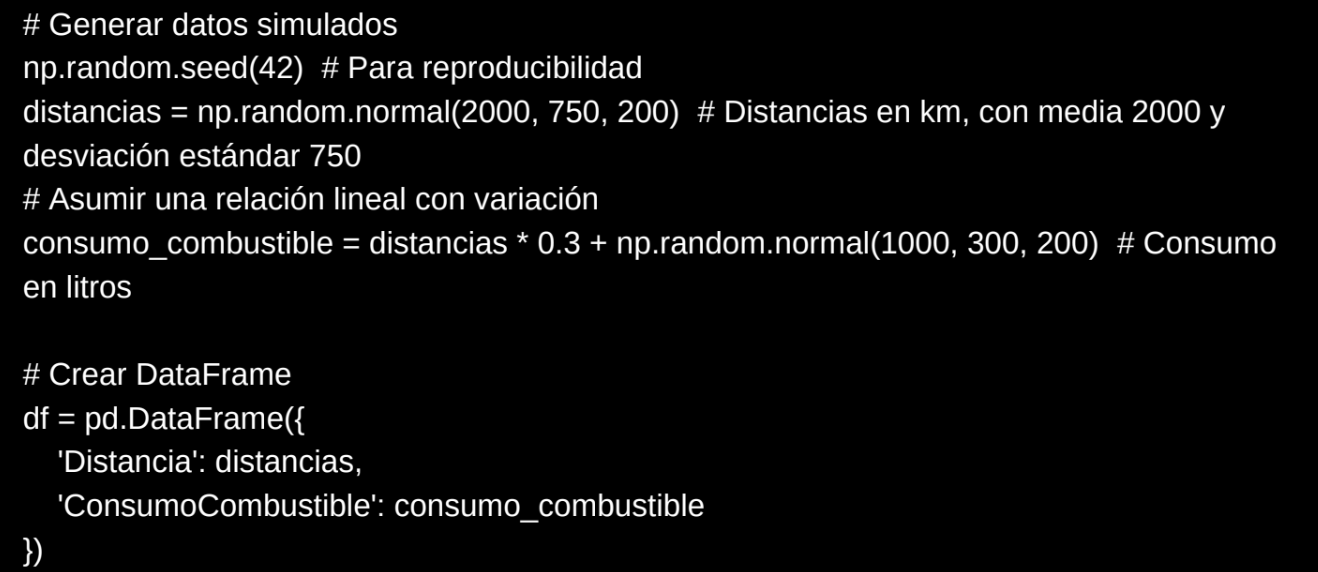

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos simulados
np.random.seed(42)  # Para reproducibilidad
distancias = np.random.normal(2000, 750, 200)  # Distancias en km, con media 2000 y desviación estándar 750
# Asumir una relación lineal con variación
consumo_combustible = distancias * 0.3 + np.random.normal(1000, 300, 200)  # Consumo en litros

# Crear DataFrame
df = pd.DataFrame({
    'Distancia': distancias,
    'ConsumoCombustible': consumo_combustible
})


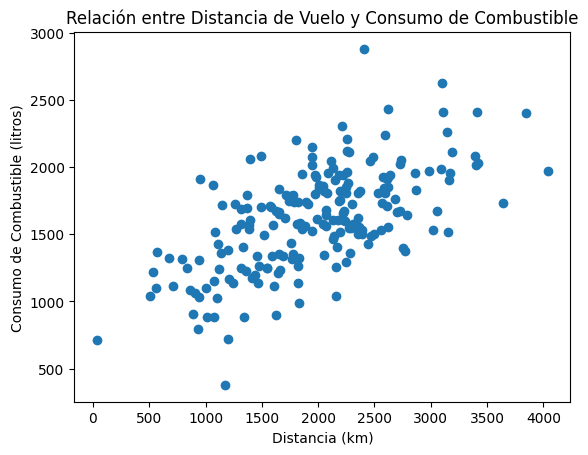

In [2]:
# Visualizar la relación entre Distancia y Consumo de Combustible
plt.scatter(df['Distancia'], df['ConsumoCombustible'])
plt.title('Relación entre Distancia de Vuelo y Consumo de Combustible')
plt.xlabel('Distancia (km)')
plt.ylabel('Consumo de Combustible (litros)')
plt.show()



In [3]:
# Análisis de correlación
print("Correlación entre Distancia y Consumo de Combustible:")
print(df.corr())


Correlación entre Distancia y Consumo de Combustible:
                    Distancia  ConsumoCombustible
Distancia            1.000000            0.627658
ConsumoCombustible   0.627658            1.000000


In [4]:
# Preparar los datos para el modelo de regresión
X = df['Distancia'].values.reshape(-1, 1)  # Cambiar la forma para sklearn
y = df['ConsumoCombustible'].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [5]:

# Predecir y evaluar el modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print("MSE (Error Cuadrático Medio):", mse)
print("R² (Coeficiente de Determinación):", r2)


Evaluación del Modelo:
MSE (Error Cuadrático Medio): 110191.68765194721
R² (Coeficiente de Determinación): 0.2483689622781513


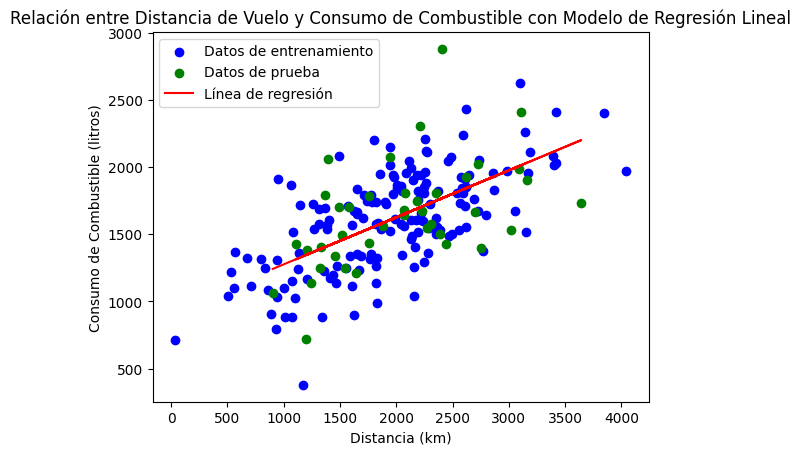

In [6]:
# Visualizar la línea de regresión
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.title('Relación entre Distancia de Vuelo y Consumo de Combustible con Modelo de Regresión Lineal')
plt.xlabel('Distancia (km)')
plt.ylabel('Consumo de Combustible (litros)')
plt.legend()
plt.show()
